<a href="https://colab.research.google.com/github/Xinsen-Zhang/torch-study/blob/master/07_%E9%9A%8F%E6%9C%BA%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 倒包

In [0]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [0]:
def data_tf(x):
    x = np.array(x, dtype = 'float32') / 255
    x = (x - 0.5) / 0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x

In [0]:
train_set = mnist.MNIST('./data', train= True, transform=data_tf, download= True)
test_set = mnist.MNIST('./data', train= False, transform=data_tf, download= True)

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
def sgd_update(parameters, lr):
    for param in parameters:
        param.data = param.data - lr * param.grad.data

# 测试（设置batch size=1）

In [0]:
train_data = DataLoader(train_set, batch_size= 1, shuffle= True)

In [7]:
# 使用Sequential定义网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 参数初始化
from torch.nn import init
init.xavier_uniform_(net[0].weight)
init.xavier_uniform_(net[-1].weight)

Parameter containing:
tensor([[ 0.0036, -0.0318,  0.0458,  ...,  0.0238,  0.1594, -0.1484],
        [-0.0983, -0.1088,  0.0671,  ...,  0.1463, -0.0022, -0.0773],
        [ 0.0404, -0.0416, -0.1073,  ..., -0.1170,  0.0232, -0.0903],
        ...,
        [ 0.0520, -0.0973,  0.1119,  ..., -0.0141, -0.1348, -0.0256],
        [-0.0531, -0.0003,  0.0245,  ...,  0.1068, -0.0382,  0.0430],
        [-0.1029, -0.1350,  0.0047,  ...,  0.0728,  0.1151,  0.1025]],
       requires_grad=True)

In [10]:
# 开始训练
losses1 = []
idx = 0

# 将网络放到gpu上
net.cuda()

start = time.time()
for e in range(10):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), lr= 1e-2)
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses1.append(loss.data)
        idx += 1
    print('epoch {}, Train loss: {:.6f}'.format(e + 1, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间:{:.5f}'.format(end - start))

epoch 1, Train loss: 0.355373
epoch 2, Train loss: 0.214861
epoch 3, Train loss: 0.186281
epoch 4, Train loss: 0.167360
epoch 5, Train loss: 0.155627
epoch 6, Train loss: 0.141930
epoch 7, Train loss: 0.137071
epoch 8, Train loss: 0.134805
epoch 9, Train loss: 0.125729
epoch 10, Train loss: 0.117885
使用时间:1025.45024


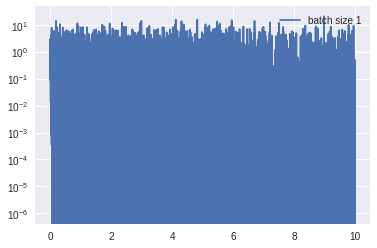

In [11]:
x_axis = np.linspace(0, 10, len(losses1),endpoint= True)
plt.semilogy(x_axis, losses1, label = 'batch size 1')
plt.legend(loc = 'best')

# batch size = 64

In [12]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential定义网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 参数初始化
from torch.nn import init
init.xavier_uniform_(net[0].weight)
init.xavier_uniform_(net[-1].weight)
# 开始训练
losses2 = []
idx = 0

# 将网络放到gpu上
net.cuda()

start = time.time()
for e in range(10):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), lr= 1e-2)
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses2.append(loss.data)
        idx += 1
    print('epoch {}, Train loss: {:.6f}'.format(e + 1, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间:{:.5f}'.format(end - start))

epoch 1, Train loss: 0.551549
epoch 2, Train loss: 0.320033
epoch 3, Train loss: 0.277003
epoch 4, Train loss: 0.248840
epoch 5, Train loss: 0.226882
epoch 6, Train loss: 0.208603
epoch 7, Train loss: 0.193541
epoch 8, Train loss: 0.180230
epoch 9, Train loss: 0.168580
epoch 10, Train loss: 0.158874
使用时间:70.31535


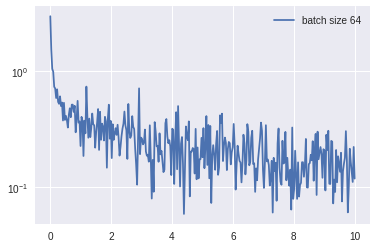

In [15]:
x_axis = np.linspace(0, 10, len(losses2),endpoint= True)
plt.semilogy(x_axis, losses2, label = 'batch size 64')
plt.legend(loc = 'best')

# lr = 0.1

In [16]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential定义网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 参数初始化
from torch.nn import init
init.xavier_uniform_(net[0].weight)
init.xavier_uniform_(net[-1].weight)
# 开始训练
losses3 = []
idx = 0

# 将网络放到gpu上
net.cuda()

start = time.time()
for e in range(10):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), lr= 1e-1)
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses3.append(loss.data)
        idx += 1
    print('epoch {}, Train loss: {:.6f}'.format(e + 1, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间:{:.5f}'.format(end - start))

epoch 1, Train loss: 0.397929
epoch 2, Train loss: 0.171499
epoch 3, Train loss: 0.126462
epoch 4, Train loss: 0.104696
epoch 5, Train loss: 0.089600
epoch 6, Train loss: 0.078810
epoch 7, Train loss: 0.069714
epoch 8, Train loss: 0.062347
epoch 9, Train loss: 0.055724
epoch 10, Train loss: 0.050650
使用时间:65.16265


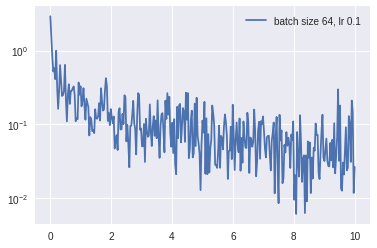

In [17]:
x_axis = np.linspace(0, 10, len(losses3),endpoint= True)
plt.semilogy(x_axis, losses3, label = 'batch size 64, lr 0.1')
plt.legend(loc = 'best')

# lr = 1.0

In [18]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential定义网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 参数初始化
from torch.nn import init
init.xavier_uniform_(net[0].weight)
init.xavier_uniform_(net[-1].weight)
# 开始训练
losses4 = []
idx = 0

# 将网络放到gpu上
net.cuda()

start = time.time()
for e in range(10):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), lr= 1e-1)
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses4.append(loss.data)
        idx += 1
    print('epoch {}, Train loss: {:.6f}'.format(e + 1, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间:{:.5f}'.format(end - start))

epoch 1, Train loss: 0.435972
epoch 2, Train loss: 0.184192
epoch 3, Train loss: 0.140594
epoch 4, Train loss: 0.116172
epoch 5, Train loss: 0.099557
epoch 6, Train loss: 0.087597
epoch 7, Train loss: 0.079368
epoch 8, Train loss: 0.071338
epoch 9, Train loss: 0.064080
epoch 10, Train loss: 0.058728
使用时间:64.77589


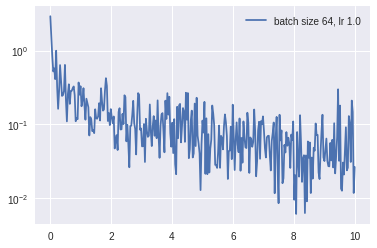

In [22]:
x_axis = np.linspace(0, 10, len(losses3),endpoint= True)
plt.semilogy(x_axis, losses3, label = 'batch size 64, lr 1.0')
plt.legend(loc = 'best')

# 使用PtTorch自带的随机梯度下降优化器

In [24]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 使用Sequential定义网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 参数初始化
from torch.nn import init
init.xavier_uniform_(net[0].weight)
init.xavier_uniform_(net[-1].weight)

# 定义优化器
optimizer = torch.optim.SGD(net.parameters(), lr= 1e-2)

# 开始训练
losses5 = []
idx = 0

# 将网络放到gpu上
net.cuda()

start = time.time()
for e in range(30):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses5.append(loss.data)
        idx += 1
    print('epoch {}, Train loss: {:.6f}'.format(e + 1, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间:{:.5f}'.format(end - start))

epoch 1, Train loss: 0.555837
epoch 2, Train loss: 0.328821
epoch 3, Train loss: 0.286672
epoch 4, Train loss: 0.257927
epoch 5, Train loss: 0.234338
epoch 6, Train loss: 0.214756
epoch 7, Train loss: 0.197987
epoch 8, Train loss: 0.183665
epoch 9, Train loss: 0.171157
epoch 10, Train loss: 0.159980
epoch 11, Train loss: 0.150015
epoch 12, Train loss: 0.141872
epoch 13, Train loss: 0.134576
epoch 14, Train loss: 0.127685
epoch 15, Train loss: 0.121573
epoch 16, Train loss: 0.116200
epoch 17, Train loss: 0.111307
epoch 18, Train loss: 0.106892
epoch 19, Train loss: 0.102593
epoch 20, Train loss: 0.098523
epoch 21, Train loss: 0.095210
epoch 22, Train loss: 0.091578
epoch 23, Train loss: 0.088373
epoch 24, Train loss: 0.085488
epoch 25, Train loss: 0.082825
epoch 26, Train loss: 0.080122
epoch 27, Train loss: 0.077709
epoch 28, Train loss: 0.075521
epoch 29, Train loss: 0.073266
epoch 30, Train loss: 0.071128
使用时间:190.04895


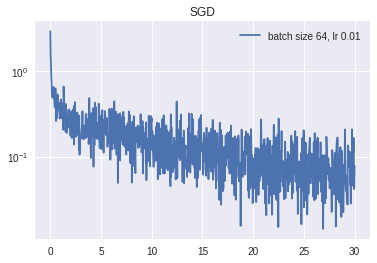

In [25]:
x_axis = np.linspace(0, 30, len(losses5),endpoint= True)
plt.semilogy(x_axis, losses5, label = 'batch size 64, lr 0.01')
plt.title('SGD')
plt.legend(loc = 'best')